# User Overview Analysis

## Imports

In [404]:
import numpy as np
import pandas as pd
import math
import sys, os
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

In [405]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from df_selector import *
from df_cleaner import *
from df_visualizer import *
from df_outlier_handler import OutlierHandler

In [406]:
pd.set_option('display.max_columns', 100)

## Utitlity Functions

## Reading Data

In [407]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
tellco_df = pd.read_csv("../data/Week1_challenge_data_source.csv", na_values=missing_values)
tellco_df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.0,0.0,52.0,65.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,42376.0,41915.0,8.123076e+07,Apple,Apple iPhone 8 Plus (A

In [408]:
# reading the field descriptions file
tellco_field_desc_df = pd.read_excel("../data/Field Descriptions.xlsx")
tellco_field_desc_df

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


## General Statistics

In [409]:
# number of elements in the df
tellco_df.size

8250055

In [410]:
# rows and columns in the df
tellco_df.shape

(150001, 55)

In [411]:
tellco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [412]:
# descriptive statistics that summarize the central tendency, dispersion of the df's numerical columns, excluding NaN values
tellco_df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156

It doesn't make sense to compute descriptive statistics for Beared Id, IMSI, MSISDN/Number and IMEI. But the describe method computes the statistics of all numeric columns. Another thing is these statisics are computed before the data is cleaned. So there might be changes after missing values and outliers are handled.

## Cleaning Columns

In [413]:
tellco_df.shape

(150001, 55)

In [414]:
# number of rows in the description
len(tellco_field_desc_df)

56

There are 150001 rows and 55 columns in the dataframe. However, we have 56 columns with their names and descriptions in tellco_field_desc_df. This means there is one column that is described but not included in the dataframe.

In [415]:
comparison_df = pd.concat([ pd.Series(tellco_df.columns.tolist()), tellco_field_desc_df['Fields']], axis=1)
comparison_df.rename(columns={0: 'Column names in dataframe', 'Fields': 'Column names in description file'}, inplace=True)
comparison_df

,Column names in dataframe,Column names in description file
0,Bearer Id,bearer id
1,Start,Dur. (ms)
2,Start ms,Start
3,End,Start ms
4,End ms,End
5,Dur. (ms),End ms
6,IMSI,Dur. (s)
7,MSISDN/Number,IMSI
8,IMEI,MSISDN/Number
9,Last Location Name,IMEI


"Dur. (ms)" is skipped in the dataframe as seen at index 1 in comparison_df. This is where the order of columns began shifting. So starting from index 1 we will compare two consequtive rows for the same column. But the same column name "Dur. (ms)" appears in the dataframe at index 5 while the description file tells us it is "Dur. (s)" at index 6. Since both columns measurement differ as shown in their name, we need to check which one is right. To investigate this, we will use the "Dur. (ms).1" column which is found at index 28 and 29 in the dataframe and description file respectively.

In [416]:
tellco_df[['Dur. (ms)', 'Dur. (ms).1']]

,Dur. (ms),Dur. (ms).1
0,1823652.0,1.823653e+09
1,1365104.0,1.365104e+09
2,1361762.0,1.361763e+09
3,1321509.0,1.321510e+09
4,1089009.0,1.089009e+09
...,...,...
149996,81230.0,8.123076e+07
149997,97970.0,9.797070e+07
149998,98249.0,9.824953e+07
149999,97910.0,9.791063e+07


It seems that the "Dur. (ms)" column is measured in seconds. So we will rename it approprietly. Let's also rename some of the columns so that they are clear as their description and follow the naming style of other columns.

In [417]:
tellco_df.rename(columns={'Dur. (ms)': 'Dur (s)', 'Dur. (ms).1': 'Dur (ms)', 'Start ms': 'Start Offset (ms)', 'End ms': 'End Offset (ms)'}, inplace=True)
tellco_df.columns.tolist()

['Bearer Id',
 'Start',
 'Start Offset (ms)',
 'End',
 'End Offset (ms)',
 'Dur (s)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 12

## Missing Values

In [418]:
percent_missing_values(tellco_df)

The dataset contains 12.72 % missing values.


In [419]:
missing_df = missing_values_table(tellco_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


In [420]:
missing_df

,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.84,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.56,float64
Nb of sec with 125000B < Vol DL,97538,65.02,float64
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.39,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.93,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.88,float64
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
HTTP UL (Bytes),81810,54.54,float64
HTTP DL (Bytes),81474,54.32,float64


As a convention, it is good to remove columns with more than 30% of missing values.

In [421]:
columns_to_be_removed = missing_df[missing_df['% of Total Values'] >= 30.00].index.tolist()
columns_to_be_removed

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'TCP DL Retrans. Vol (Bytes)',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

Even though the TCP variables have way too much missing values, instead of removing we will imput since we need them for our analysis later.

In [422]:
columns_to_be_removed = [col for col in columns_to_be_removed if col not in ['TCP UL Retrans. Vol (Bytes)',
    'TCP DL Retrans. Vol (Bytes)']]
columns_to_be_removed

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [423]:
tellco_clean = tellco_df.drop(columns_to_be_removed, axis=1)
tellco_clean.shape

(150001, 47)

Now let's check the status of missing values in the modified dataframe.

In [424]:
percent_missing_values(tellco_clean)

The dataset contains 3.85 % missing values.


In [425]:
missing_values_table(tellco_clean)

Your selected dataframe has 47 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values,Dtype
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
Avg RTT DL (ms),27829,18.55,float64
Avg RTT UL (ms),27812,18.54,float64
Handset Type,9559,6.37,object
Handset Manufacturer,9559,6.37,object
Last Location Name,1153,0.77,object
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64


Since the missing percentages of 'TCP UL Retrans. Vol (Bytes)' and 'TCP DL Retrans. Vol (Bytes)' are very high we will impute them with the bacward fill method. In this case, using a single value like mean or median is not advisable as it may heavily bais our data in an unwanted way by making the majority of values equal to a single value.

In [426]:
fix_missing_bfill(tellco_clean, 'TCP UL Retrans. Vol (Bytes)')

96649 missing values in the column TCP UL Retrans. Vol (Bytes) have been replaced using the backward fill method.


0         7230.0
1         7230.0
2         7230.0
3         7230.0
4         7230.0
           ...  
149996       NaN
149997       NaN
149998       NaN
149999       NaN
150000       NaN
Name: TCP UL Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [427]:
fix_missing_bfill(tellco_clean, 'TCP DL Retrans. Vol (Bytes)')

88146 missing values in the column TCP DL Retrans. Vol (Bytes) have been replaced using the backward fill method.


0         19520.0
1         19520.0
2         19520.0
3         19520.0
4         19520.0
           ...   
149996        NaN
149997        NaN
149998        NaN
149999        NaN
150000        NaN
Name: TCP DL Retrans. Vol (Bytes), Length: 150001, dtype: float64

Avg RTT DL (ms) and Avg RTT UL (ms) have the next highest percentages of missing values with around 18.5% each.

In [428]:
tellco_clean['Avg RTT DL (ms)'].skew(skipna=True)

62.90782807995961

In [429]:
tellco_clean['Avg RTT UL (ms)'].skew(skipna=True)

28.45741458546382

Since both the columns Avg RTT DL (ms) and Avg RTT UL (ms) are heavily positively skewed, it is advisable not to impute them with their mean. So we will use forward fill.

In [430]:
fix_missing_ffill(tellco_clean, 'Avg RTT DL (ms)')

27829 missing values in the column Avg RTT DL (ms) have been replaced using the forward fill method.


0         42.0
1         65.0
2         65.0
3         65.0
4         65.0
          ... 
149996    32.0
149997    27.0
149998    43.0
149999    37.0
150000    37.0
Name: Avg RTT DL (ms), Length: 150001, dtype: float64

In [431]:
fix_missing_ffill(tellco_clean, 'Avg RTT UL (ms)')

27812 missing values in the column Avg RTT UL (ms) have been replaced using the forward fill method.


0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
149996    0.0
149997    2.0
149998    6.0
149999    5.0
150000    5.0
Name: Avg RTT UL (ms), Length: 150001, dtype: float64

In [432]:
percent_missing_values(tellco_clean)

The dataset contains 0.44 % missing values.


In [433]:
percent_missing_rows(tellco_clean)

7.96 % of the rows in the dataset contain atleast one missing value.


In [434]:
missing_values_table(tellco_clean)

Your selected dataframe has 47 columns.
There are 31 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Handset Type,9559,6.37,object
Handset Manufacturer,9559,6.37,object
Last Location Name,1153,0.77,object
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64
UL TP > 300 Kbps (%),792,0.53,float64
50 Kbps < UL TP < 300 Kbps (%),792,0.53,float64
10 Kbps < UL TP < 50 Kbps (%),792,0.53,float64
UL TP < 10 Kbps (%),792,0.53,float64


Since "Handset Type" and "Handset Manufacturer" are categorical columns, it is better to impute them with the value "unknown" so that we don't bias the data.

In [435]:
fix_missing_value(tellco_clean, 'Handset Type', 'unknown')
fix_missing_value(tellco_clean, 'Handset Manufacturer', 'unknown')

9559 missing values in the column Handset Type have been replaced by unknown.
9559 missing values in the column Handset Manufacturer have been replaced by unknown.


0         Samsung
1         Samsung
2         Samsung
3         unknown
4         Samsung
           ...   
149996      Apple
149997      Apple
149998      Apple
149999     Huawei
150000    unknown
Name: Handset Manufacturer, Length: 150001, dtype: object

In [436]:
percent_missing_values(tellco_clean)

The dataset contains 0.17 % missing values.


In [437]:
percent_missing_rows(tellco_clean)

2.08 % of the rows in the dataset contain atleast one missing value.


Since only 2.08% of the rows contain atleast one missing value and the total number of rows is around 150000, dropping these rows won't have a noticable negative impact.

In [438]:
drop_rows_with_missing_values(tellco_clean)

3114 rows containg missing values were dropped.


In [439]:
percent_missing_values(tellco_clean)

The dataset contains 0.0 % missing values.


## Data Type Conversion

In [440]:
tellco_clean.dtypes

Bearer Id                         float64
Start                              object
Start Offset (ms)                 float64
End                                object
End Offset (ms)                   float64
Dur (s)                           float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              

In [441]:
tellco_clean

,Bearer Id,Start,Start Offset (ms),End,End Offset (ms),Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur (ms),Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,65.0,5.0,44.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,unknown,unknown,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,7.349883e+18,4/29/2019 7:28,794.0,4/30/2019 0:36,523.0,61661.0,2.082017e+14,3.376215e+10,3.586061e+13,D10033B,27.0,2.0,62.0,54.0,16552848.0,162614.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,22520.0,26980.0,6.166173e+07,Apple,Apple iPhone 6S Plus (A1687),136.0,149.0,857971.0,57778.0,8438995.0,3597665.0,1079443.0,651174.0,7404819.0,9864285.0,18954727.0,19382787.0,258688968.0,9542486.0,249358264.0,14134902.0,57231077.0,295424923.0
149992,1.311448e+19,4/29/2019 7:28,114.0,4/30/2019 7:04,724.0,84940.0,2.082014e+14,3.376127e+10,3.532701e+13,D78058B,37.0,4.0,23.0,40.0,16552848.0,162614.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,26597.0,30281.0,8.494061e+07,Apple,Apple iPhone 6S (A1688),94.0,97.0,1717476.0,35240.0,3455682.0,3827662.0,60320.0,894557.0,22428728.0,14385815.0,6940672.0,6801943.0,35738570.0,7842728.0,8084

By observing the columns we can realize that "Start" and "End" columns are actually datetime values even though they are labelled  as objects by pandas. Besides these two cloumns all the other columns with object data types are actually string values. So we will convert these columns to their appropriate data types.

In [442]:
convert_to_datetime(tellco_clean, ['Start', 'End'])

In [443]:
# get the columns with object data type
string_columns = tellco_clean.select_dtypes(include='object').columns.tolist()
string_columns

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [444]:
convert_to_string(tellco_clean, string_columns)

We also know that Bearer Id, IMSI, MSISDN/Number, IMEI are unique numbers used for identification. So for better readability we will change them from float64 to int64.

In [445]:
int_cols = ['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI',]
convert_to_int(tellco_clean, int_cols)

In [446]:
tellco_clean.dtypes

Bearer Id                                  int64
Start                             datetime64[ns]
Start Offset (ms)                        float64
End                               datetime64[ns]
End Offset (ms)                          float64
Dur (s)                                  float64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                        string
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

## Dropping Duplicates

In [447]:
# search for duplicate rows and drop them
drop_duplicates(tellco_clean)

No duplicate rows were found.


As we have seen in the column cleaning section we have two duration columns one in seconds and the other in micro seconds. Let us check if the values are equal by converting the micro seconds to seconds.

In [448]:
temp_df = tellco_clean[['Dur (s)', 'Dur (ms)']].copy()
multiply_by_factor(temp_df, ['Dur (ms)'], 1/1000)
temp_df['comparison'] = (temp_df['Dur (s)'] == temp_df['Dur (ms)'].apply(math.floor))
temp_df

,Dur (s),Dur (ms),comparison
0,1823652.0,1823652.892,True
1,1365104.0,1365104.371,True
2,1361762.0,1361762.651,True
3,1321509.0,1321509.685,True
4,1089009.0,1089009.389,True
...,...,...,...
149991,61661.0,61661.729,True
149992,84940.0,84940.610,True
149993,125622.0,125622.433,True
149994,113545.0,113545.185,True


In [449]:
print(all(temp_df['comparison']))

True


This proves that when floored these two columns are the same. So we will keep "Dur (ms)" as it is more precise and drop "Dur (s)".

In [450]:
drop_columns(tellco_clean, ['Dur (s)'])

1 column was dropped.


## Outlier Treatment

In [451]:
outlier_handler = OutlierHandler(tellco_clean)

In [452]:
columns = tellco_clean.select_dtypes('float64').columns.tolist()
columns

['Start Offset (ms)',
 'End Offset (ms)',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [453]:
outlier_handler.getOverview(columns)

Name of columns,DL TP > 1 Mbps (%),10 Kbps < UL TP < 50 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Nb of sec with Vol UL < 1250B,Nb of sec with Vol DL < 6250B,UL TP < 10 Kbps (%),TCP DL Retrans. Vol (Bytes),Avg Bearer TP UL (kbps),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),Avg RTT UL (ms),Avg RTT DL (ms),50 Kbps < DL TP < 250 Kbps (%),Avg Bearer TP DL (kbps),Dur (ms),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Total UL (Bytes),Youtube UL (Bytes),Other UL (Bytes),Other DL (Bytes),Gaming UL (Bytes),Gaming DL (Bytes),Netflix UL (Bytes),Netflix DL (Bytes),Start Offset (ms),Youtube DL (Bytes),Email UL (Bytes),Email DL (Bytes),Google UL (Bytes),Google DL (Bytes),Social Media UL (Bytes),Social Media DL (Bytes),End Offset (ms),Total DL (Bytes)
Min,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7142988.0,0.0,0.0,2866892.0,105.0,148.0,3290.0,59.0,2516.0,35.0,42.0,0.0,53.0,2.0,14.0,3.0,207.0,0.0,12.0,0.0,7114041.0
Q1,0.0,0.0,0.0,15418.0,22073.0,107.0,87.0,99.0,24895.0,47.0,3299.5,91.0,2.0,31.0,0.0,43.0,58526863.0,0.0,0.0,33218346.0,5516549.0,4144551.0,210155459.0,4132622.0,210381659.0,5480202.0,5776625.5,250.0,5833462.0,233439.0,892573.0,1024371.5,2882586.5,16431.0,898089.0,251.0,243073402.5
Median,0.0,0.0,0.0,39726.0,47180.0,217.0,201.0,100.0,391635.0,63.0,16436.0,100.0,5.0,44.0,0.0,64.0,86399988.0,0.0,0.0,41143144.0,11013447.0,8265817.0,421633232.0,8294516.0,423492394.0,10999348.0,11642708.0,499.0,11616334.0,466357.0,1793613.0,2054793.0,5766724.0,32908.0,1793409.0,500.0,455963875.0
Q3,0.0,0.0,1.0,697298.5,611803.0,2466.5,2612.5,100.0,3078146.0,1136.0,68622.0,100.0,13.0,67.0,4.0,20024.0,133159382.0,0.0,0.0,49034880.0,16514278.0,12382039.5,631361047.5,12432390.5,633333998.5,16503222.5,17469653.0,749.0,17440635.5,700297.5,2689818.0,3088071.5,8625551.0,49326.5,2694640.0,750.0,665783068.0
Max,94.0,98.0,76.0,136536461.0,144911293.0,604122.0,604061.0,100.0,4294425570.0,58613.0,2908226006.0,100.0,7120.0,96923.0,93.0,378160.0,1859336442.0,85.0,96.0,78331311.0,22011962.0,16558816.0,843442489.0,16558794.0,843441889.0,22011955.0,23259189.0,999.0,23259098.0,936418.0,3586146.0,4121357.0,11462832.0,65870.0,3586064.0,999.0,902969616.0
IQR,0.0,0.0,1.0,681880.5,589730.0,2359.5,2525.5,1.0,3053251.0,1089.0,65322.5,9.0,11.0,36.0,4.0,19981.0,74632519.0,0.0,0.0,15816534.0,10997729.0,8237488.5,421205588.5,8299768.5,422952339.5,11023020.5,11693027.5,499.0,11607173.5,466858.5,1797245.0,2063700.0,5742964.5,32895.5,1796551.0,499.0,422709665.5
Lower fence,0.0,0.0,-1.5,-1007402.75,-862522.0,-3432.25,-3701.25,97.5,-4554981.5,-1586.5,-94684.25,77.5,-14.5,-23.0,-6.0,-29928.5,-53421915.5,0.0,0.0,9493545.0,-10980044.5,-8211681.75,-421652923.75,-8317030.75,-424046850.25,-11054328.75,-11762915.75,-498.5,-11577298.25,-466848.75,-1803294.5,-2071178.5,-5731860.25,-32912.25,-1796737.5,-497.5,-390991095.75
Upper fence,0.0,0.0,2.5,1720119.25,1496398.0,6005.75,6400.75,101.5,7658022.5,2769.5,166605.75,113.5,29.5,121.0,10.0,49995.5,245108160.5,0.0,0.0,72759681.0,33010871.5,24738272.25,1263169430.25,24882043.25,1267762507.75,33037753.25,35009194.25,1497.5,34851395.75,1400585.25,5385685.5,6183621.5,17239997.75,98669.75,5389466.5,1498.5,1299847566.25
Skew,5.345557,10.941071,4.503234,5.821286,7.321154,7.467915,9.009273,-8.958674,16.755094,4.473627,96.168844,-2.293488,26.544463,68.322057,3.273684,2.57405,3.946116,21.051707,35.993888,-0.001944,-0.001265,0.001481,0.001832,-0.002566,-0.003914,-0.000273,-0.002172,0.000823,0.000119,0.007312,-0.002659,0.002242,-0.008414,0.000258,-0.001633,-0.001251,-0.003579
Number_of_outliers,36594,31509,29343,26126,25501,24870,24604,21811,21625,21104,20367,18114,16278,16181,14955,12678,7057,4476,2425,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [454]:
outlier_handler.replace_outliers_with_fences(columns)

In [455]:
outlier_handler.getOverview(columns)

Name of columns,Start Offset (ms),Nb of sec with Vol DL < 6250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Nb of sec with Vol UL < 1250B,Dur (ms),End Offset (ms),Activity Duration UL (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Total DL (Bytes)
Min,0.0,1.0,12.0,0.0,207.0,3.0,14.0,2.0,53.0,105.0,42.0,35.0,2516.0,59.0,3290.0,148.0,9493545.0,1.0,7142988.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,77.5,0.0,0.0,0.0,97.5,0.0,0.0,0.0,0.0,7114041.0
Q1,250.0,87.0,898089.0,16431.0,2882586.5,1024371.5,892573.0,233439.0,5833462.0,5516549.0,5776625.5,5480202.0,210381659.0,4132622.0,210155459.0,4144551.0,33218346.0,107.0,58526863.0,251.0,22073.0,31.0,2.0,43.0,47.0,24895.0,3299.5,91.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,15418.0,243073402.5
Median,499.0,201.0,1793409.0,32908.0,5766724.0,2054793.0,1793613.0,466357.0,11616334.0,11013447.0,11642708.0,10999348.0,423492394.0,8294516.0,421633232.0,8265817.0,41143144.0,217.0,86399988.0,500.0,47180.0,44.0,5.0,64.0,63.0,391635.0,16436.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,39726.0,455963875.0
Q3,749.0,2612.5,2694640.0,49326.5,8625551.0,3088071.5,2689818.0,700297.5,17440635.5,16514278.0,17469653.0,16503222.5,633333998.5,12432390.5,631361047.5,12382039.5,49034880.0,2466.5,133159382.0,750.0,611803.0,67.0,13.0,20024.0,1136.0,3078146.0,68622.0,100.0,4.0,1.0,0.0,100.0,0.0,0.0,0.0,697298.5,665783068.0
Max,999.0,6400.75,3586064.0,65870.0,11462832.0,4121357.0,3586146.0,936418.0,23259098.0,22011962.0,23259189.0,22011955.0,843441889.0,16558794.0,843442489.0,16558816.0,72759681.0,6005.75,245108160.5,999.0,1496398.0,121.0,29.5,49995.5,2769.5,7658022.5,166605.75,100.0,10.0,2.5,0.0,100.0,0.0,0.0,0.0,1720119.25,902969616.0
IQR,499.0,2525.5,1796551.0,32895.5,5742964.5,2063700.0,1797245.0,466858.5,11607173.5,10997729.0,11693027.5,11023020.5,422952339.5,8299768.5,421205588.5,8237488.5,15816534.0,2359.5,74632519.0,499.0,589730.0,36.0,11.0,19981.0,1089.0,3053251.0,65322.5,9.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,681880.5,422709665.5
Lower fence,-498.5,-3701.25,-1796737.5,-32912.25,-5731860.25,-2071178.5,-1803294.5,-466848.75,-11577298.25,-10980044.5,-11762915.75,-11054328.75,-424046850.25,-8317030.75,-421652923.75,-8211681.75,9493545.0,-3432.25,-53421915.5,-497.5,-862522.0,-23.0,-14.5,-29928.5,-1586.5,-4554981.5,-94684.25,77.5,-6.0,-1.5,0.0,97.5,0.0,0.0,0.0,-1007402.75,-390991095.75
Upper fence,1497.5,6400.75,5389466.5,98669.75,17239997.75,6183621.5,5385685.5,1400585.25,34851395.75,33010871.5,35009194.25,33037753.25,1267762507.75,24882043.25,1263169430.25,24738272.25,72759681.0,6005.75,245108160.5,1498.5,1496398.0,121.0,29.5,49995.5,2769.5,7658022.5,166605.75,113.5,10.0,2.5,0.0,101.5,0.0,0.0,0.0,1720119.25,1299847566.25
Skew,0.000823,1.205814,-0.001633,0.000258,-0.008414,0.002242,-0.002659,0.007312,0.000119,-0.001265,-0.002172,-0.000273,-0.003914,-0.002566,0.001832,0.001481,-0.001978,1.209533,0.810422,-0.001251,1.207483,1.069479,1.165443,1.280613,1.230407,1.216388,1.20234,-1.22817,1.315047,1.098748,0.0,-0.947267,0.0,0.0,0.0,1.205281,-0.003579
Number_of_outliers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Deriving New Columns

Even though we have separated upload and download data volumes for each application, having the sum of them as a total is necessary for insights.

In [456]:
tellco_clean['Social Media Data Volume (Bytes)'] = tellco_clean['Social Media UL (Bytes)'] + tellco_clean['Social Media DL (Bytes)']
tellco_clean['Google Data Volume (Bytes)'] = tellco_clean['Google UL (Bytes)'] + tellco_clean['Google DL (Bytes)']
tellco_clean['Email Data Volume (Bytes)'] = tellco_clean['Email UL (Bytes)'] + tellco_clean['Email DL (Bytes)']
tellco_clean['Youtube Data Volume (Bytes)'] = tellco_clean['Youtube UL (Bytes)'] + tellco_clean['Youtube DL (Bytes)']
tellco_clean['Netflix Data Volume (Bytes)'] = tellco_clean['Netflix UL (Bytes)'] + tellco_clean['Netflix DL (Bytes)']
tellco_clean['Gaming Data Volume (Bytes)'] = tellco_clean['Gaming UL (Bytes)'] + tellco_clean['Gaming DL (Bytes)']
tellco_clean['Other Data Volume (Bytes)'] = tellco_clean['Other UL (Bytes)'] + tellco_clean['Other DL (Bytes)']
tellco_clean['Total Data Volume (Bytes)'] = tellco_clean['Total UL (Bytes)'] + tellco_clean['Total DL (Bytes)']

In [457]:
tellco_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146887 entries, 0 to 149995
Data columns (total 54 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Bearer Id                         146887 non-null  int64         
 1   Start                             146887 non-null  datetime64[ns]
 2   Start Offset (ms)                 146887 non-null  float64       
 3   End                               146887 non-null  datetime64[ns]
 4   End Offset (ms)                   146887 non-null  float64       
 5   IMSI                              146887 non-null  int64         
 6   MSISDN/Number                     146887 non-null  int64         
 7   IMEI                              146887 non-null  int64         
 8   Last Location Name                146887 non-null  string        
 9   Avg RTT DL (ms)                   146887 non-null  float64       
 10  Avg RTT UL (ms)                 

## Saving Data

In [458]:
# save the clean dataframe to a csv file
tellco_clean.to_csv('../data/clean_data.csv')

## Univariate Analysis

### Handset Manufacturer

In [459]:
# unique value counts
counts_df = tellco_clean['Handset Manufacturer'].value_counts()
counts_df

Apple                                  59069
Samsung                                39902
Huawei                                 33754
unknown                                 8820
Sony Mobile Communications Ab            925
                                       ...  
Hongkong Ipro Technology Co Limited        1
Shenzhen Malata                            1
Ovvi-Cellphone Tech. Inc.                  1
Beijing Shenqi Technology Co Ltd           1
Compal Electronics Inc                     1
Name: Handset Manufacturer, Length: 168, dtype: Int64

In [460]:
plotly_plot_pie(tellco_clean, 'Handset Manufacturer', 200)

### Handset Type

In [461]:
# unique value counts
counts_df = tellco_clean['Handset Type'].value_counts()
counts_df

Huawei B528S-23A                   19373
Apple iPhone 6S (A1688)             9369
Apple iPhone 6 (A1586)              8967
unknown                             8820
Apple iPhone 7 (A1778)              6240
                                   ...  
Casper Bilgisaya. Via M1               1
Spa Condor Elect. Plume L1 Plus        1
Gotron (Hk) Elec. Gemini               1
Lenovo Moto E Plus (4Th Gen)           1
Doro Ab Doro 8040                      1
Name: Handset Type, Length: 1363, dtype: Int64

In [462]:
plotly_plot_pie(tellco_clean, 'Handset Type', 700)

### Dur (ms)

In [463]:
# important statistical measurements of center and dispersion
tellco_clean[['Dur (ms)']].describe()

,Dur (ms)
count,1.468870e+05
mean,1.001894e+08
std,5.898822e+07
min,7.142988e+06
25%,5.852686e+07
50%,8.639999e+07
75%,1.331594e+08
max,2.451082e+08


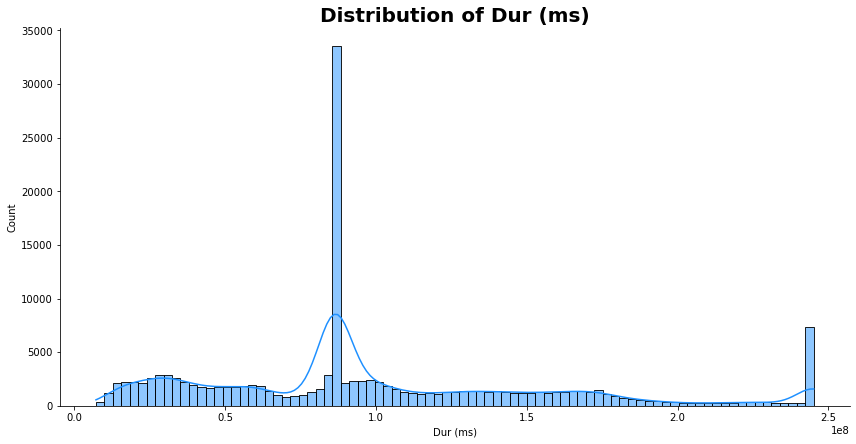

In [464]:
plot_hist(tellco_clean, 'Dur (ms)', 'dodgerblue')

### Social Media Data Volume (Bytes)

In [465]:
# important statistical measurements of center and dispersion
tellco_clean[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.468870e+05
mean,1.827736e+06
std,1.035571e+06
min,1.563000e+03
25%,9.313390e+05
50%,1.825390e+06
75%,2.727156e+06
max,3.650861e+06


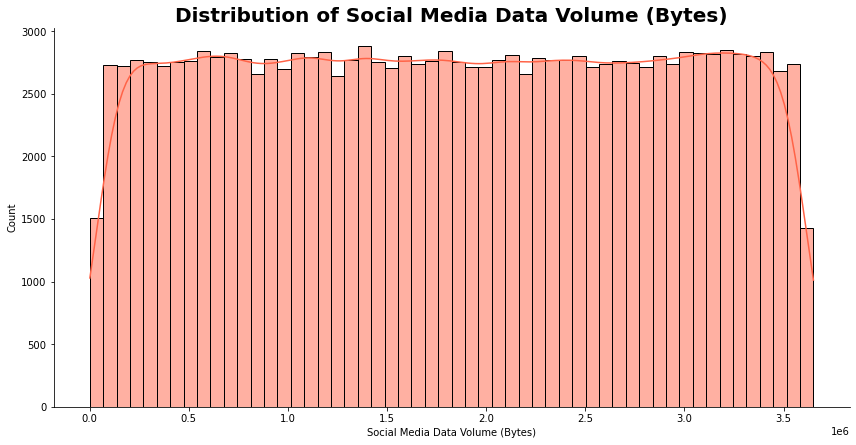

In [466]:
plot_hist(tellco_clean, 'Social Media Data Volume (Bytes)', 'tomato')

### Google Data Volume (Bytes)

In [467]:
# important statistical measurements of center and dispersion
tellco_clean[['Google Data Volume (Bytes)']].describe()

,Google Data Volume (Bytes)
count,1.468870e+05
mean,7.807976e+06
std,3.517132e+06
min,4.033000e+04
25%,4.943585e+06
50%,7.815531e+06
75%,1.068314e+07
max,1.552878e+07


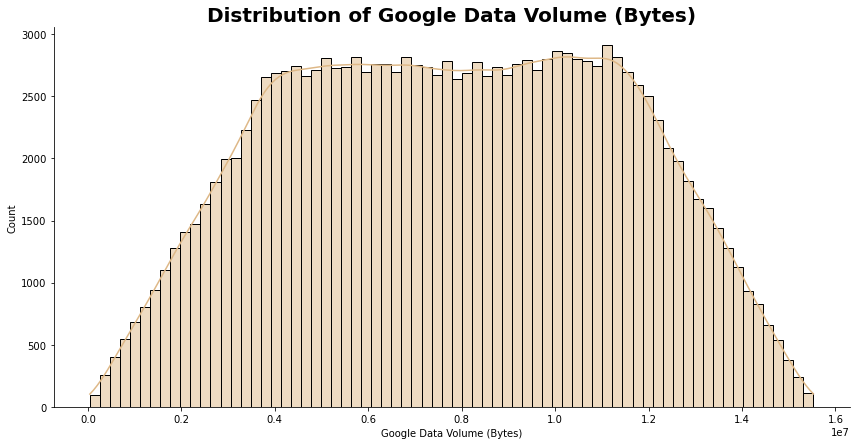

In [468]:
plot_hist(tellco_clean, 'Google Data Volume (Bytes)', 'burlywood')

### Email Data Volume (Bytes)

In [469]:
# important statistical measurements of center and dispersion
tellco_clean[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,1.468870e+05
mean,2.259087e+06
std,1.071133e+06
min,8.359000e+03
25%,1.359012e+06
50%,2.263890e+06
75%,3.159616e+06
max,4.518036e+06


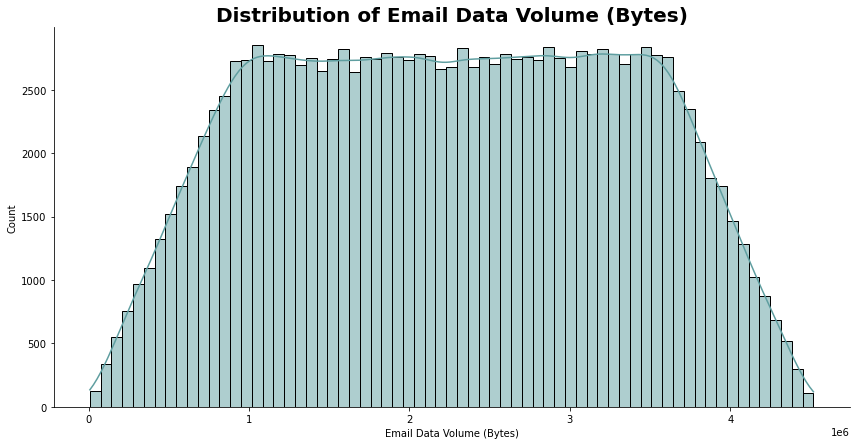

In [470]:
plot_hist(tellco_clean, 'Email Data Volume (Bytes)', 'cadetblue')

### Youtube Data Volume (Bytes)

In [471]:
# important statistical measurements of center and dispersion
tellco_clean[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.468870e+05
mean,2.264198e+07
std,9.244659e+06
min,1.296550e+05
25%,1.599692e+07
50%,2.266341e+07
75%,2.929351e+07
max,4.519008e+07


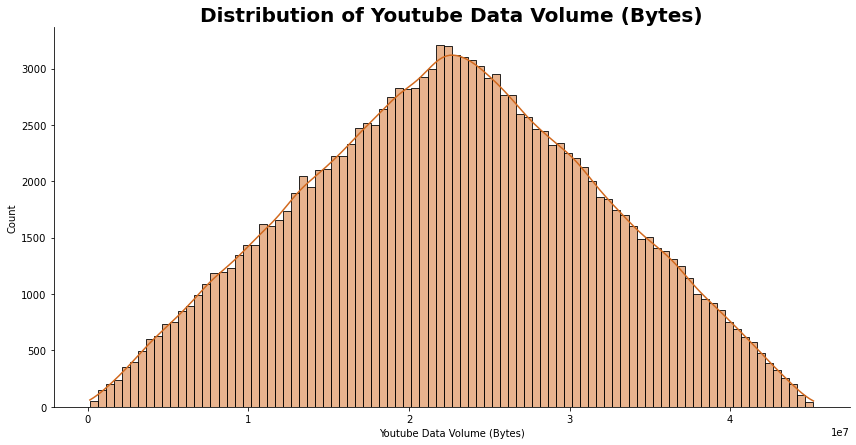

In [472]:
plot_hist(tellco_clean, 'Youtube Data Volume (Bytes)', 'chocolate')

### Netflix Data Volume (Bytes)

In [473]:
# important statistical measurements of center and dispersion
tellco_clean[['Netflix Data Volume (Bytes)']].describe()

,Netflix Data Volume (Bytes)
count,1.468870e+05
mean,2.262923e+07
std,9.259113e+06
min,9.843200e+04
25%,1.598200e+07
50%,2.263459e+07
75%,2.928806e+07
max,4.519815e+07


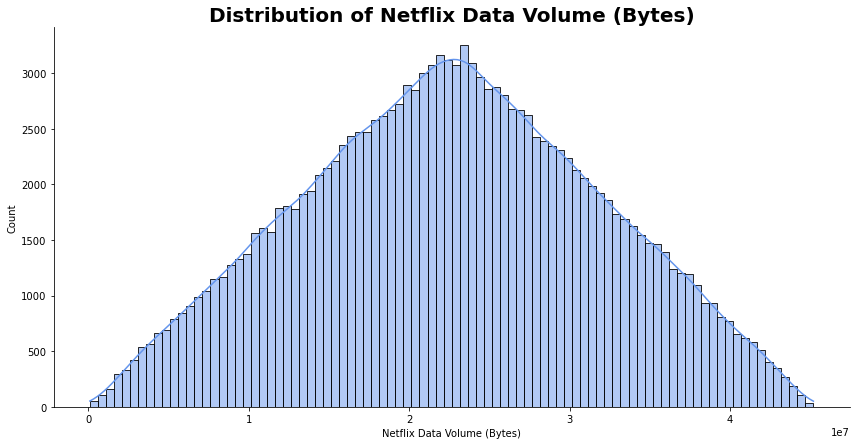

In [474]:
plot_hist(tellco_clean, 'Netflix Data Volume (Bytes)')

### Gaming Data Volume (Bytes)

In [475]:
# important statistical measurements of center and dispersion
tellco_clean[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,1.468870e+05
mean,4.303526e+08
std,2.440925e+08
min,3.063580e+05
25%,2.186904e+08
50%,4.316603e+08
75%,6.415752e+08
max,8.592028e+08


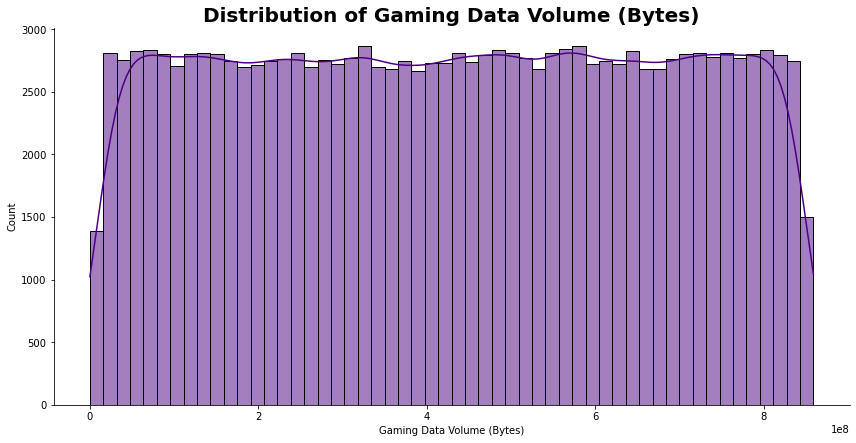

In [476]:
plot_hist(tellco_clean, 'Gaming Data Volume (Bytes)', 'indigo')

### Other Data Volume (Bytes)

In [477]:
# important statistical measurements of center and dispersion
tellco_clean[['Other Data Volume (Bytes)']].describe()

,Other Data Volume (Bytes)
count,1.468870e+05
mean,4.292669e+08
std,2.432060e+08
min,1.490450e+05
25%,2.184772e+08
50%,4.297978e+08
75%,6.396625e+08
max,8.595209e+08


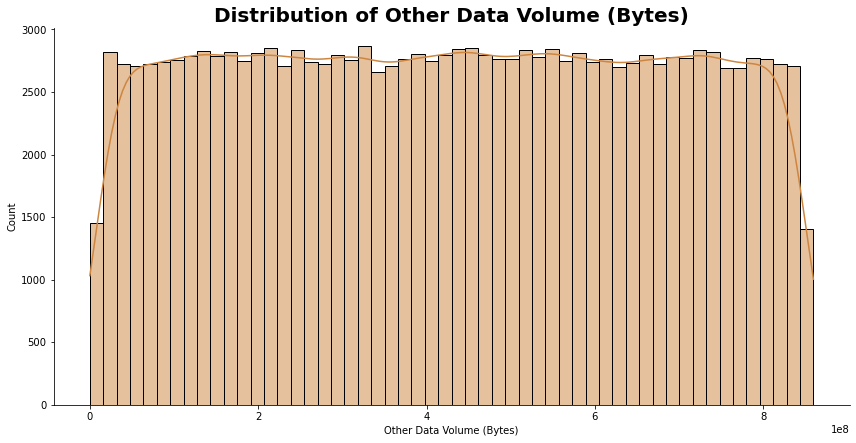

In [478]:
plot_hist(tellco_clean, 'Other Data Volume (Bytes)', 'peru')

### Total Data Volume (Bytes)

In [479]:
# important statistical measurements of center and dispersion
tellco_clean[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,1.468870e+05
mean,4.957815e+08
std,2.444434e+08
min,2.895611e+07
25%,2.844777e+08
50%,4.969362e+08
75%,7.066379e+08
max,9.536316e+08


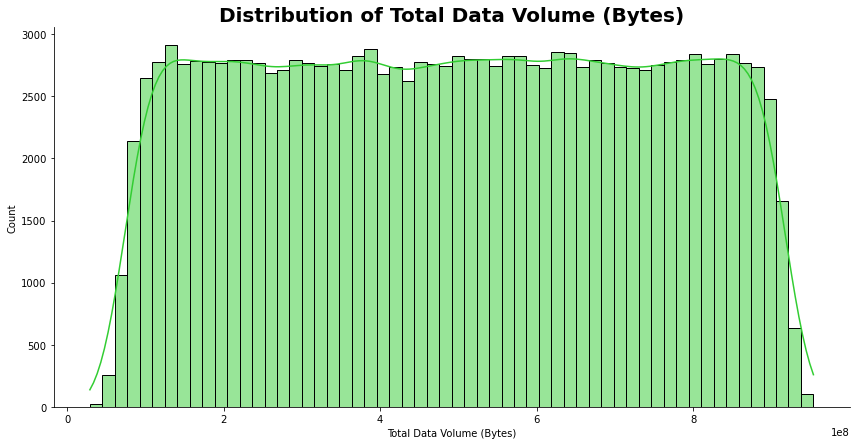

In [480]:
plot_hist(tellco_clean, 'Total Data Volume (Bytes)', 'limegreen')

## Bivariate Analysis

### Social Media Data Volume (Bytes) and Total Data Volume (Bytes)

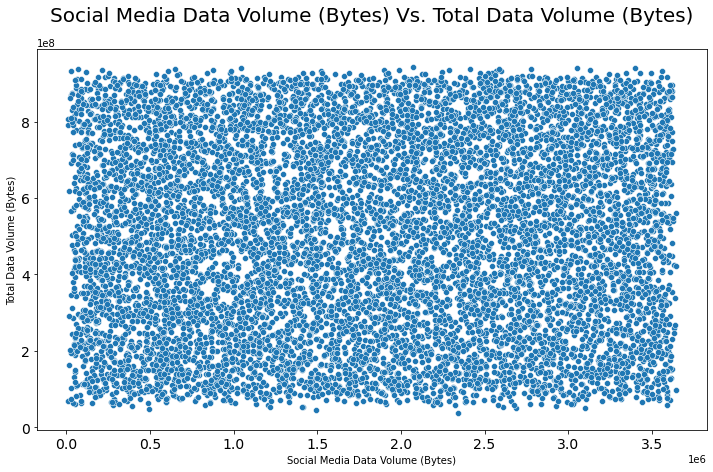

In [481]:
plot_scatter(tellco_clean.sample(10000), 'Social Media Data Volume (Bytes)', 'Total Data Volume (Bytes)')

### Google Data Volume (Bytes) and Total Data Volume (Bytes)

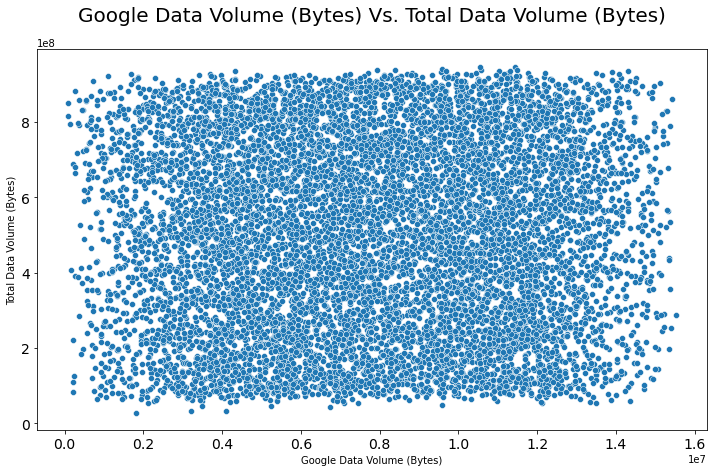

In [482]:
plot_scatter(tellco_clean.sample(10000), 'Google Data Volume (Bytes)', 'Total Data Volume (Bytes)')

### Email Data Volume (Bytes) and Total Data Volume (Bytes)

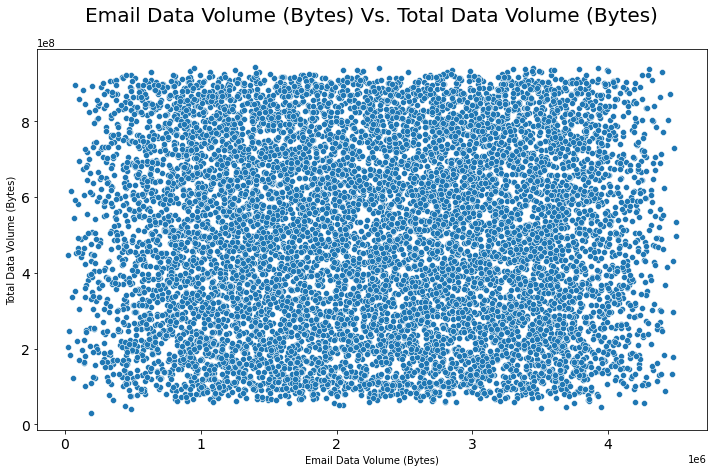

In [483]:
plot_scatter(tellco_clean.sample(10000), 'Email Data Volume (Bytes)', 'Total Data Volume (Bytes)')

### Youtube Data Volume (Bytes) and Total Data Volume (Bytes)

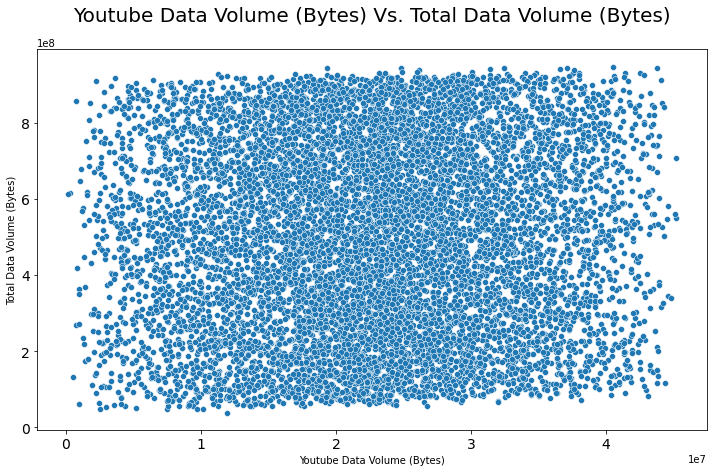

In [484]:
plot_scatter(tellco_clean.sample(10000), 'Youtube Data Volume (Bytes)', 'Total Data Volume (Bytes)')

### Netflix Data Volume (Bytes) and Total Data Volume (Bytes)

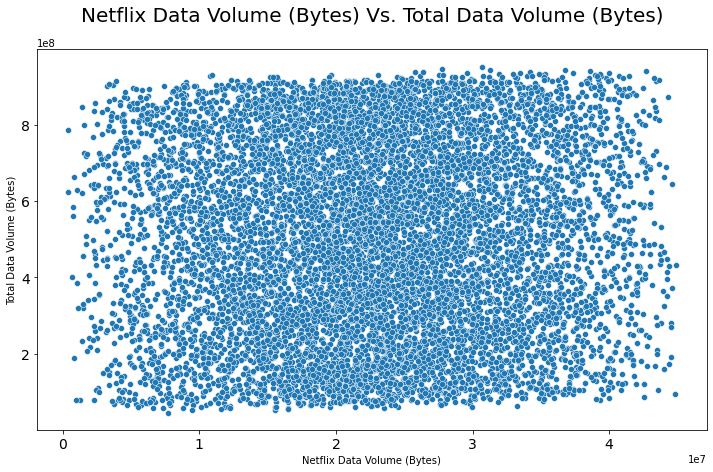

In [485]:
plot_scatter(tellco_clean.sample(10000), 'Netflix Data Volume (Bytes)', 'Total Data Volume (Bytes)')

### Gaming Data Volume (Bytes) and Total Data Volume (Bytes)

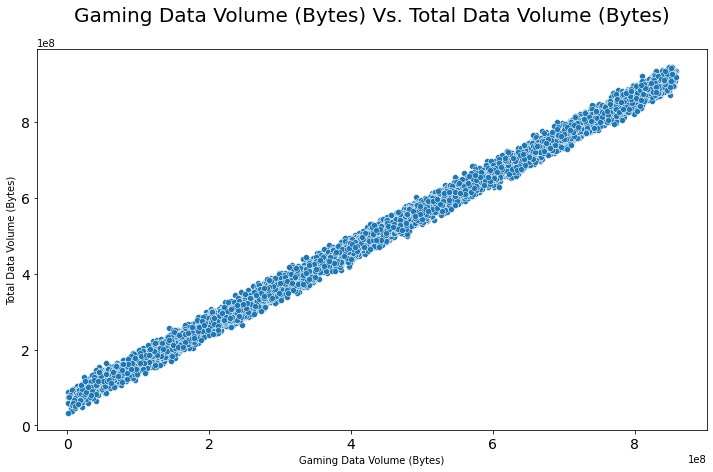

In [486]:
plot_scatter(tellco_clean.sample(10000), 'Gaming Data Volume (Bytes)', 'Total Data Volume (Bytes)')

## Correlation Analysis

In [487]:
application_cols = ['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)',
    'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)',
    'Other Data Volume (Bytes)']

corr_df = tellco_clean[application_cols].corr()
corr_df

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,-0.001933,0.004208,0.000570,0.001354,0.001894,0.005561
Google Data Volume (Bytes),-0.001933,1.000000,-0.000036,0.002172,-0.002018,-0.000800,-0.001268
Email Data Volume (Bytes),0.004208,-0.000036,1.000000,-0.003430,0.001518,0.000071,-0.000801
Youtube Data Volume (Bytes),0.000570,0.002172,-0.003430,1.000000,0.003604,-0.003674,0.003250
Netflix Data Volume (Bytes),0.001354,-0.002018,0.001518,0.003604,1.000000,-0.003546,-0.007924
Gaming Data Volume (Bytes),0.001894,-0.000800,0.000071,-0.003674,-0.003546,1.000000,-0.002814
Other Data Volume (Bytes),0.005561,-0.001268,-0.000801,0.003250,-0.007924,-0.002814,1.000000


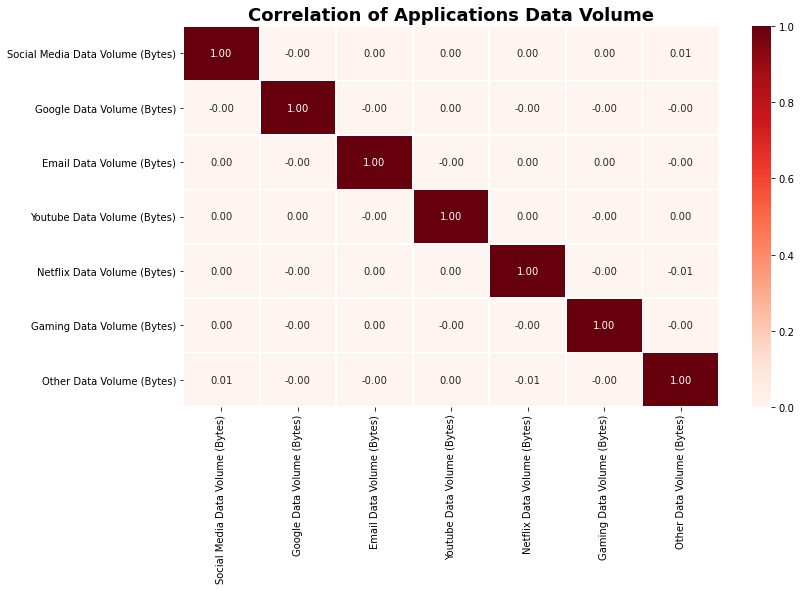

In [488]:
plot_heatmap(corr_df, "Correlation of Applications Data Volume")

As shown above there is no significant correlation among the applications data usage.

## Filtering Data

### **Top 10 handsets used by the customers**

In [489]:
handset_counts_df = count_values(tellco_clean, 'Handset Type').head(10)
handset_counts_df

,Handset Type,count
0,Huawei B528S-23A,19373
1,Apple iPhone 6S (A1688),9369
2,Apple iPhone 6 (A1586),8967
3,unknown,8820
4,Apple iPhone 7 (A1778),6240
5,Apple iPhone Se (A1723),5150
6,Apple iPhone 8 (A1905),4961
7,Apple iPhone Xr (A2105),4542
8,Samsung Galaxy S8 (Sm-G950F),4404
9,Apple iPhone X (A1901),3788


### Top 3 handset manufacturers

In [490]:
top_manufacturers = count_values(tellco_clean, 'Handset Manufacturer').head(3)
top_manufacturers

,Handset Manufacturer,count
0,Apple,59069
1,Samsung,39902
2,Huawei,33754


### Top 5 handsets of the top 3 handset manufacturers

In [491]:
top3_manufacturers = top_manufacturers['Handset Manufacturer'].values
top_manufacturers = tellco_clean[tellco_clean["Handset Manufacturer"].isin(top3_manufacturers)]
top_manufacturers['Handset Type'].groupby(
    tellco_clean['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9369
                      Apple iPhone 6 (A1586)             8967
                      Apple iPhone 7 (A1778)             6240
                      Apple iPhone Se (A1723)            5150
                      Apple iPhone 8 (A1905)             4961
Huawei                Huawei B528S-23A                  19373
                      Huawei E5180                       2062
                      Huawei P20 Lite Huawei Nova 3E     2000
                      Huawei P20                         1471
                      Huawei Y6 2018                      984
Samsung               Samsung Galaxy S8 (Sm-G950F)       4404
                      Samsung Galaxy A5 Sm-A520F         3673
                      Samsung Galaxy J5 (Sm-J530)        3664
                      Samsung Galaxy J3 (Sm-J330)        3431
                      Samsung Galaxy S7 (Sm-G930X)       3106
Name: Handset Typ

### Number of xDR sessions of per user

In [492]:
xdr_per_user = find_agg(tellco_clean, 'MSISDN/Number', 'count', 'Bearer Id', False)
xdr_per_user.rename(
        columns={'Bearer Id': 'Number of xDR sessions'}, inplace=True)
xdr_per_user

,MSISDN/Number,Number of xDR sessions
0,33626320676,18
1,33625779332,17
2,33614892860,17
3,33659725664,16
4,33675877202,15
...,...,...
105711,33660669493,1
105712,33660669025,1
105713,33660668320,1
105714,33660668134,1


### Average session duration per user

In [493]:
session_duration_per_user = tellco_clean.groupby('MSISDN/Number').agg({'Dur (ms)': 'mean'})
session_duration_per_user.rename(
        columns={'Dur (ms)': 'Average session duration (ms)'}, inplace=True)
session_duration_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

,Average session duration (ms)
MSISDN/Number,
337000037000919,245108160.5
33762185850,245108160.5
33762190964,245108160.5
33667099979,245108160.5
33762199147,245108160.5
33667078134,245108160.5
33667077911,245108160.5
33762213743,245108160.5
33646337581,245108160.5


### Total download (DL) and upload (UL) data per user

In [494]:
total_data = tellco_clean.groupby('MSISDN/Number')[[ 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_data.nlargest(10, 'Total Data Volume (Bytes)')

,Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860,689483001.0,8.156743e+09,8.846226e+09
33760536639,703478581.0,7.811295e+09,8.514774e+09
33625779332,729577380.0,7.770043e+09,8.499621e+09
33626320676,669650721.0,7.301517e+09,7.971167e+09
33675877202,581568792.0,7.309542e+09,7.891111e+09
33659725664,624260321.0,7.081602e+09,7.705863e+09
33666464084,405060976.0,6.903440e+09,7.308501e+09
33760413819,521518890.0,6.610852e+09,7.132371e+09
33664712899,471562882.0,6.400774e+09,6.872337e+09


### Total data volumne of each application per user

In [495]:
apps_total = tellco_clean.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum()
apps_total.nlargest(10, 'Total Data Volume (Bytes)')

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33614892860,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09,8.846226e+09
33760536639,39783189.0,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09,8.514774e+09
33625779332,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09,8.499621e+09
33626320676,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09,7.971167e+09
33675877202,19222921.0,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09,7.891111e+09
33659725664,35412358.0,116516345.0,35999792.0,257991088.0,399519079.0,6.725559e+09,6.317415e+09,7.705863e+09
33666464084,18629986.0,89320737.0,25557139.0,227336012.0,214416926.0,6.646303e+09,4.349141e+09,7.308501e+09
33760413819,20777205.0,82738720.0,25576965.0,303169107.0,318347546.0,6.268620e+09,4.101645e+09,7.132371e+09
33664712899,19390599.0,90389372.0,21426007.0,276834013.0,251798809.0,6.103856e+09,3.976960e+09,6.872337e+09
